## SEATTLE
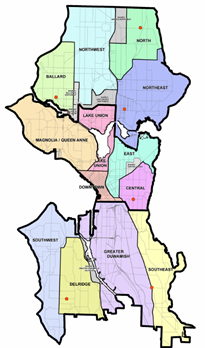

Pour atteindre l'objectif de ville neutre en émissions de carbone en 2050, la ville de Seattle s’interesse de pres aux émissions des batiments non destines à l’habitation.

Des releves minutieux ont ete effectues en 2015 et en 2016. Cependant, ces releves sont couteux à obtenir, et a partir de ceux deja réalises, nous devons tenter de predire les émissions de CO2 et la consommation totale d’energie de batiments pour lesquels elles n’ont pas encore ete mesurees.

Apres un leger nettoyage et une courte analyse exploratoire, nous allons encoder les variables categorielles pour avoir un fichier disponible pour la modelisation

source image :
	https://fr.wikipedia.org/wiki/Liste_des_quartiers_de_Seattle#/media/Fichier:Map_of_Seattle,_divided_by_districts.png




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
d_2015=pd.read_csv("C:/Users/leila/2015-building-energy-benchmarking.csv",sep=',',low_memory=False)

In [3]:
d_2015.head()


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [4]:
d_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [5]:
d_2016=pd.read_csv("C:/Users/leila/2016_Building_Energy_Benchmarking.csv",sep=',',low_memory=False)

In [6]:
d_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


#### Rassemblement des deux datasets

D'apres les premieres lignes, les deux data n'ont pas les memes colonnes

In [7]:
def differ_col(d1,d2):
    '''Colonnes differentes entre d1 et d2
    Args : d1, d2 dataframes
    Return : liste des colonnes de d1 qui ne sont pas dans d2 et liste des colonnes de d2 qui ne sont pas dans d1'''
    
    set_col_d1=set(d1.columns)
    set_col_d2=set(d2.columns)
    return ([list(set_col_d1-set_col_d2),list(set_col_d2-set_col_d1)])

differ_col(d_2015,d_2016)

[['Comment',
  'Location',
  '2010 Census Tracts',
  'GHGEmissions(MetricTonsCO2e)',
  'GHGEmissionsIntensity(kgCO2e/ft2)',
  'Seattle Police Department Micro Community Policing Plan Areas',
  'Zip Codes',
  'City Council Districts',
  'OtherFuelUse(kBtu)',
  'SPD Beats'],
 ['Longitude',
  'ZipCode',
  'City',
  'Latitude',
  'Address',
  'Comments',
  'GHGEmissionsIntensity',
  'TotalGHGEmissions',
  'State']]

On constate des noms de colonne qui passent du singulier au pluriel, des changements de noms mais semblant etre la meme information (a verifier) et enfin la localisation qui est un dictionnaire en 2015 et ce meme dictionnaire est separe en colonnes en 2016.  
Les colonnes 'Comment' et 'Comments' vont etre supprimees en raison de leur tres faible taux de remplissage.  
On suppose que les changements en 2016 sont pour une bonne raison, donc on va garder la localisation separee de 2016 ie transformer la colonne Location de 2015 en colonnes de 2016. Verifier que GHGEmissionsIntensity(kgCO2e/ft2) correspond a GHGEmissionsIntensity.
Enfin on va supprimer les colonnes de 2015 qui n'ont pas de correspondant en 2016

In [8]:
# suppression des colonnes presentes en 2015 et pas en 2016 et des colonnes 'Comment(s)'
d_2015.drop(['Seattle Police Department Micro Community Policing Plan Areas','OtherFuelUse(kBtu)','SPD Beats','Zip Codes',
             'Comment','City Council Districts','2010 Census Tracts'],axis=1,inplace=True)
d_2016.drop(['Comments'],axis=1,inplace=True)

In [9]:
#comparaison des contenus pour GHGEmissionsIntensity(kgCO2e/ft2) et GHGEmissionsIntensity
print(d_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe())
d_2016['GHGEmissionsIntensity'].describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64


count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

In [10]:
#comparaison entre GHGEmissions(MetricTonsCO2e) et TotalGHGEmissions
print(d_2015['GHGEmissions(MetricTonsCO2e)'].describe())
d_2016['TotalGHGEmissions'].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64


count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

Les ordres de grandeur sont les memes dans les 2 cas donc il n'y a pas eu de changement d'unite entre les deux annees

In [11]:
d_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [12]:
# changement de la colonne Location suivant les colonnes de 2016
import ast
d_2015['Location']=[ast.literal_eval(str(item)) for index, item in d_2015.Location.iteritems()]
d_2015=pd.concat([d_2015.drop(['Location'], axis=1), d_2015['Location'].apply(pd.Series)], axis=1)
d_2015['human_address']=[ast.literal_eval(str(item)) for index, item in d_2015.human_address.iteritems()]
d_2015=pd.concat([d_2015.drop(['human_address'], axis=1), d_2015['human_address'].apply(pd.Series)], axis=1)
d_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,latitude,longitude,address,city,state,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,...,2.64,No,Compliant,NaN,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,...,2.38,No,Compliant,NaN,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,...,1.92,Yes,Compliant,NaN,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,...,31.38,No,Compliant,High Outlier,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,...,4.02,No,Compliant,NaN,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121


In [13]:
#renommage des colonnes de 2015
d_2015=d_2015.rename(columns={"latitude":"Latitude", "longitude":"Longitude","address":"Address","city":"City","state":"State",
                              "zip":"ZipCode",'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                     'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'})

#verification de l'identite des colonnes entre 2015 et 2016
differ_col(d_2015,d_2016)

[[], []]

les deux datasets ont les memes colonnes, on peut les concatener

In [14]:
d=pd.concat([d_2015[d_2016.columns],d_2016], axis = 0).sort_values(["DataYear", "OSEBuildingID"])
d.shape

(6716, 45)

#### Nettoyage

L'etude doit porter sur les batiments non residentiels. On va donc supprimer les batiments residentiels. L'information se trouve dans la colonne BuildingType

In [15]:
print(list(d['BuildingType'].unique()))

['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)', 'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus', 'Multifamily HR (10+)', 'Nonresidential WA']


In [16]:
resid=[z for z in list(d['BuildingType'].unique()) if 'Multifamily' in z]
dnr=d[~d['BuildingType'].isin(resid)].copy()
dnr.shape

(3318, 45)

Un certain nombre de colonnes sont redondantes. La conversion entre les unites est 1 kBtu = 0.2930701797575255 kwh et 1 kBtu=100 therms. Une des variables a predire est en kBtu, on va donc garder les variables en kBtu.  
WN signifie Wheather Normalized donc les variables se terminant par WN sont des variables normalisees suivant la meteo or celle-ci ne concerne pas notre analyse donc on peut supprimer ces colonnes.

In [17]:
to_del=[z for z in dnr.columns if 'WN' in z]+['NaturalGas(therms)','Electricity(kWh)']
dnr.drop(to_del,axis=1,inplace=True)

L'etude est sur les batiments et non sur l'evolution temporelle. On va donc regarder les batiments communs entre 2015 et 2016 et pour ces batiments prendre la moyenne des valeurs pour les variables numeriques sauf les 4 premieres colonnes

In [18]:
#lisste des colonnes numeriques
l=dnr.select_dtypes(include=np.number).columns.tolist()
grp_mean=l[4:]
#regroupement des donnees par batiment en moyennant sur les deux annees
id_means=dnr[['OSEBuildingID']+grp_mean].groupby('OSEBuildingID').mean()
id_means.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,
1,1.0,12.0,88434.0,0.0,88434.0,88434.0,NaN,NaN,62.5,80.299998,178.000000,7103895.25,2.013457e+06,3816093.5,1274420.5,249.705,2.735
2,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,56.0,94.600002,183.700003,8371084.00,0.000000e+00,3574131.0,4797033.5,279.685,2.620
3,1.0,41.0,959050.0,98359.0,860691.0,756868.0,100000.0,0.0,30.5,96.300000,242.299997,72858840.00,2.061348e+07,49644549.5,2601850.0,2075.380,2.055
5,1.0,10.0,61320.0,0.0,61320.0,61320.0,NaN,NaN,28.5,285.600002,426.249998,17511952.00,1.283648e+07,2768973.5,1906553.5,1111.385,18.025
8,1.0,18.0,147735.0,37230.0,110505.0,123445.0,68009.0,0.0,71.0,117.450002,220.099997,14500852.50,0.000000e+00,5717426.0,8783551.5,506.355,3.450


In [20]:
#recuperation des informations non numerique par batiment
unique_building=dnr.drop_duplicates(subset=['OSEBuildingID'], keep='last').copy()
#suppression des colonnes numeriques traitees
unique_building.drop(grp_mean, axis=1, inplace=True)
#il ne reste plus qu'a fusionner unique_building et ID_means
dbat = pd.merge(unique_building, id_means, how='left', on='OSEBuildingID')
dbat.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1.698000e+03,1698.000000,1.698000e+03,1.686000e+03,...,361.000000,1154.000000,1697.000000,1697.000000,1.697000e+03,1.697000e+03,1.697000e+03,1.697000e+03,1697.000000,1697.000000
mean,16339.776207,2015.982332,4.369258,1961.704947,1.148704,4.101885,1.183777e+05,13421.728504,1.049560e+05,9.887040e+04,...,14719.000829,64.951906,72.104331,176.282793,8.457072e+06,5.133132e+05,5.865634e+06,1.971806e+06,185.235053,1.501859
std,13811.042261,0.131780,2.191411,32.850343,2.810159,6.516620,2.951875e+05,42938.707728,2.806832e+05,2.757407e+05,...,36335.391749,28.041709,73.490710,183.783580,3.010387e+07,5.351773e+06,2.069226e+07,9.400898e+06,745.538021,2.266608
min,1.000000,2015.000000,1.000000,1900.000000,0.500000,0.000000,1.128500e+04,-1.000000,-8.451000e+03,6.455000e+03,...,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.120000,0.000000
25%,584.250000,2016.000000,2.000000,1930.000000,1.000000,1.000000,2.939250e+04,0.000000,2.833200e+04,2.548025e+04,...,2592.000000,46.500000,32.900000,77.250002,1.215360e+06,0.000000e+00,7.328030e+05,0.000000e+00,20.150000,0.275000
50%,21161.000000,2016.000000,4.000000,1965.000000,1.000000,2.000000,4.926600e+04,0.000000,4.739150e+04,4.348400e+04,...,5931.000000,72.500000,51.700001,131.750000,2.555917e+06,0.000000e+00,1.649172e+06,4.974050e+05,50.215000,0.785000
75%,24601.750000,2016.000000,7.000000,1989.000000,1.000000,4.000000,1.068380e+05,0.000000,9.524950e+04,9.198825e+04,...,12400.000000,88.000000,82.450000,206.549997,6.960904e+06,0.000000e+00,4.871044e+06,1.507822e+06,139.630000,1.765000
max,50226.000000,2016.000000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,...,459748.000000,100.000000,834.400024,2620.000000,8.739237e+08,1.314066e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000


La modelisation doit pouvoir predire les valeurs des variables SiteEnergyUse(kBtu) et TotalGHGEmissions. On supprime les lignes ou ces deux variables ne sont pas renseignees

In [21]:
dbat=dbat[((dbat['TotalGHGEmissions'].notna())&(dbat['SiteEnergyUse(kBtu)'].notna()))]

Les valeurs max des deux variables sont atypiques et vont poser probleme dans toute modelisation

In [22]:
dbat[((dbat['TotalGHGEmissions']>10**5)|(dbat['SiteEnergyUse(kBtu)']>8*10**8))]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
1657,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105,1625049001,...,NaN,NaN,93.800003,246.600006,873923712.0,84985240.0,657074389.0,0.0,11140.56,1.2


L'universite de Whasington-Seattle est "hors normes" on va supprimer ce campus pour notre etude

On regarde quelle est la signification de la colonne Outlier

In [23]:
dbat['Outlier'].unique()

array([nan, 'Low Outlier', 'High outlier', 'Low outlier'], dtype=object)

<AxesSubplot:xlabel='SiteEnergyUse(kBtu)', ylabel='TotalGHGEmissions'>

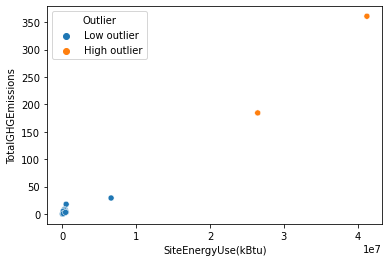

In [24]:
dbat['Outlier']=dbat['Outlier'].apply(lambda x : 'Low outlier' if x=='Low Outlier' else x)
outlier=dbat[dbat['Outlier'].notna()]
plt.figure()
sns.scatterplot(data=outlier,x='SiteEnergyUse(kBtu)',y='TotalGHGEmissions',hue='Outlier')

Les batiments qui ont une indication dans outlier sont des outliers pour les variables a predire. Nous allons donc garder cette colonne.

#### Etude de la dependance des variables

Les variables a predire dependent necessairement de la taille des batiments donc de la surface au sol et du nombre d'etages, de la consommation d'electricite et de gaz. 
La surface total de la propriete est egale à la surface du batiment plus celle du parking. De facon plus globale toutes les variables GFA (Ground Floor Area) sont liees entre elles.  
Commencons par traiter le probleme des surfaces.  
1) remplacer les surfaces des batiments et des parking par leur proportion par rapport a la surface totale  
2) avoir la surface moyenne par batiment et par etage  
3) avoir le nombre d'utilisateurs de la propriete


In [25]:
#suppression de l'universite hors norme
data=dbat[((dbat['TotalGHGEmissions']<10**5)&(dbat['SiteEnergyUse(kBtu)']<8*10**8))].copy()

# 1) et suppression des colonnes devenues inutiles
data['GFABuildingProp']=(round((data['PropertyGFABuilding(s)'].fillna(0)/data['PropertyGFATotal'].fillna(0)),5))
data['GFAParkingProp']=(round((data['PropertyGFAParking'].fillna(0)/data['PropertyGFATotal'].fillna(0)),5))
data.drop(['PropertyGFABuilding(s)','PropertyGFAParking'],axis=1,inplace=True)

# 2)
data['GFAPerBuilding']=round((data['PropertyGFATotal'] / data['NumberofBuildings']),3)
data['GFAPerFloor']=round((data['PropertyGFATotal'] / data['NumberofFloors']),3)
# si un des denominateurs est nul on a des valeurs infinies, on corrige
data.loc[data['NumberofBuildings']==0,'GFAPerBuilding']=0
data.loc[data['NumberofFloors']==0,'GFAPerFloor']=0

# 3) le nombre d'utilisateurs correpond au nombre de ',' +1 dans la valeur de la colonne ListOfAllPropertyUseTypes
data['UseTypeNumber'] = [str(x).count(",") + 1 for x in data['ListOfAllPropertyUseTypes'].str.split(',')]
#on peut supprimer a priori les colonnes concernees par les deuxieme et troisieme types d'utilisateurs
data.drop(['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','SecondLargestPropertyUseType',
           'ThirdLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ListOfAllPropertyUseTypes'], axis=1, inplace=True)

data.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),...,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,GFABuildingProp,GFAParkingProp,GFAPerBuilding,GFAPerFloor,UseTypeNumber
count,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1696.000000,1.696000e+03,1154.000000,1696.000000,1696.000000,...,1.696000e+03,1.696000e+03,1.696000e+03,1696.000000,1696.000000,1696.000000,1696.000000,1.696000e+03,1.696000e+03,1696.000000
mean,16315.191627,2015.982901,4.369104,1961.746462,1.084021,4.106132,1.129566e+05,64.951906,72.091539,176.241333,...,4.635067e+05,5.481667e+06,1.972968e+06,178.775545,1.502037,0.937397,0.062603,1.096207e+05,3.356299e+04,1.890920
std,13793.614957,0.129679,2.192632,32.834824,0.884737,6.519266,1.930146e+05,28.041709,73.510496,183.829847,...,4.944305e+06,1.334482e+07,9.403549e+06,696.638613,2.267265,0.139189,0.139189,1.877463e+05,4.699922e+04,1.221928
min,1.000000,2015.000000,1.000000,1900.000000,0.500000,0.000000,1.128500e+04,1.000000,0.000000,0.000000,...,0.000000e+00,7.000000e+00,0.000000e+00,0.120000,0.000000,-0.251160,-0.000010,7.166667e+03,0.000000e+00,1.000000
25%,583.750000,2016.000000,2.000000,1930.000000,1.000000,1.000000,2.938900e+04,46.500000,32.862500,77.250001,...,0.000000e+00,7.309188e+05,0.000000e+00,20.143750,0.275000,1.000000,0.000000,2.917767e+04,1.296000e+04,1.000000
50%,21147.500000,2016.000000,4.000000,1965.000000,1.000000,2.000000,4.925050e+04,72.500000,51.700001,131.749999,...,0.000000e+00,1.647078e+06,4.979542e+05,50.142500,0.785000,1.000000,0.000000,4.926600e+04,2.263505e+04,2.000000
75%,24601.250000,2016.000000,7.000000,1989.000000,1.000000,4.000000,1.062238e+05,88.000000,82.112501,206.400002,...,0.000000e+00,4.864170e+06,1.508798e+06,139.555000,1.765000,1.000000,0.000000,1.041622e+05,3.767585e+04,2.000000
max,50226.000000,2016.000000,7.000000,2015.000000,20.000000,99.000000,2.200000e+06,100.000000,834.400024,2620.000000,...,1.314066e+08,2.796294e+08,2.979090e+08,16870.980000,34.090000,1.000010,1.251160,2.761918e+06,1.100000e+06,13.000000


Regardons la repartition des nombres d'usagers par batiment

In [26]:
data['UseTypeNumber'].value_counts()

1     829
2     507
3     206
4      81
5      43
6      20
7       4
9       3
13      1
11      1
8       1
Name: UseTypeNumber, dtype: int64

Il semble plus pertinent de considerer cette variable comme categorielle en choisissant soit un utilisateur soit plusieurs

In [27]:
data['UseTypeNumber']=data['UseTypeNumber'].apply(lambda x: 'un' if x==1 else 'plusieurs')

On va remplacer la date de construction par l'age du batiment, ce qui sera plus utile pour la modelisation.

In [28]:
data['AgeBuilding']=data['DataYear']-data['YearBuilt']
data.drop('YearBuilt',axis=1,inplace=True)

Etude de la correlation des variables numeriques

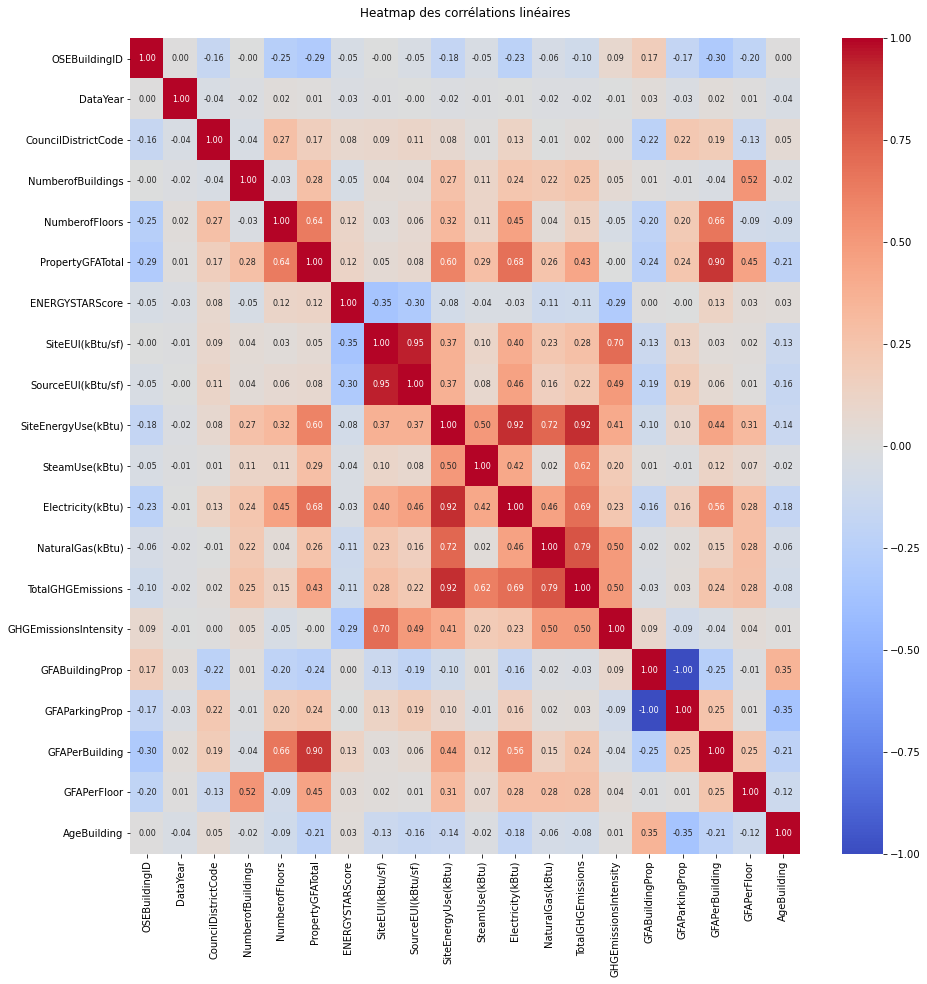

In [29]:
corr = data.corr()

fig,ax=plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr,annot=True,fmt=".2f",annot_kws={'size':8},center=0,cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

In [30]:
threshold=0.69
corr_pairs=corr.unstack().sort_values(kind="quicksort")
hard_corr=(pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)]).reset_index().rename(columns={0:'corr_coeff'}))
hard_corr=hard_corr[(hard_corr.index%2==0) & (hard_corr['level_0']!=hard_corr['level_1'])]
hard_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
16,SourceEUI(kBtu/sf),SiteEUI(kBtu/sf),0.952277
14,Electricity(kBtu),SiteEnergyUse(kBtu),0.916307
12,TotalGHGEmissions,SiteEnergyUse(kBtu),0.916273
10,GFAPerBuilding,PropertyGFATotal,0.896405
8,TotalGHGEmissions,NaturalGas(kBtu),0.790994
6,SiteEnergyUse(kBtu),NaturalGas(kBtu),0.723662
4,SiteEUI(kBtu/sf),GHGEmissionsIntensity,0.700612
2,Electricity(kBtu),TotalGHGEmissions,0.691876
0,GFAParkingProp,GFABuildingProp,-1.000000


Les variables finissant en EUI(kBtu/sf) sont des valeurs par surface d'étage. On peut les supprimer puisque l'on a cree les colonnes necessaires pour revenir aux donnees par etage ou par batiment. Idem pour la variable GHGEmissionsIntensity

In [31]:
to_drop=[x for x in data.columns if 'EUI(kBtu/sf)' in x]+['GHGEmissionsIntensity']
data.drop(to_drop,axis=1,inplace=True)

#### Courte analyse exploratoire

Les 2 variables à prédire dans le cadre de notre mission sont :

   - TotalGHGEmissions
   - SiteEnergyUse(kBtu)
   
Quelle est la distribution de ces variables ?


In [32]:
data[['TotalGHGEmissions','SiteEnergyUse(kBtu)']].describe()

,TotalGHGEmissions,SiteEnergyUse(kBtu)
count,1696.000000,1.696000e+03
mean,178.775545,7.946774e+06
std,696.638613,2.155481e+07
min,0.120000,0.000000e+00
25%,20.143750,1.214237e+06
50%,50.142500,2.551750e+06
75%,139.555000,6.954664e+06
max,16870.980000,4.483853e+08


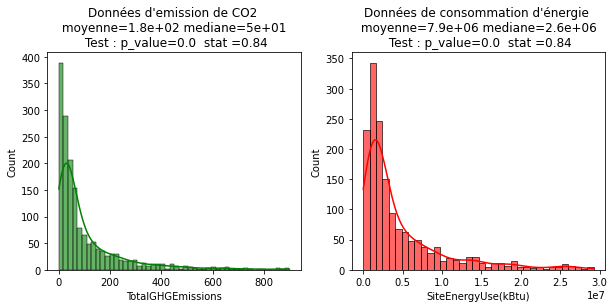

In [33]:
import scipy.stats as stats

#Test de Kolmogorov-Smirnov
ksCO2=stats.kstest(data['TotalGHGEmissions'].notnull(),'norm')
ksNRJ=stats.kstest(data['SiteEnergyUse(kBtu)'].notnull(),'norm')

moyCO2=data['TotalGHGEmissions'].mean()
medCO2=data['TotalGHGEmissions'].median()
moyNRJ=data['SiteEnergyUse(kBtu)'].mean()
medNRJ=data['SiteEnergyUse(kBtu)'].median()

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10,4))

sns.histplot(data=data[(data['TotalGHGEmissions']<900)],x="TotalGHGEmissions",kde=True,ax=axes[0],color="g",alpha=0.6)
axes[0].set_title("Données d'emission de CO2 \n moyenne={:.2} mediane={:.2} \n Test : p_value={}  stat ={:.2}".format(moyCO2,
                                                                                    medCO2,ksCO2.pvalue, ksCO2.statistic))


sns.histplot(data=data[(data['SiteEnergyUse(kBtu)']<3*10**7)],x="SiteEnergyUse(kBtu)",kde=True, ax=axes[1],color="r",alpha=0.6)
axes[1].set_title("Données de consommation d'énergie \n moyenne={:.2} mediane={:.2} \n Test : p_value={}  stat ={:.2}".format(moyNRJ,
                                                                                    medNRJ,ksNRJ.pvalue, ksNRJ.statistic))


plt.show()

Les distributions ne suivent pas une loi normale, la moyenne est tres superieure a la mediane et la p_value est < 0.05 (au risque de 5 %)

Text(0.5, 1.0, "Consommation d'énergie en log \n moyenne=1.5e+01 mediane=1.5e+01 \n ")

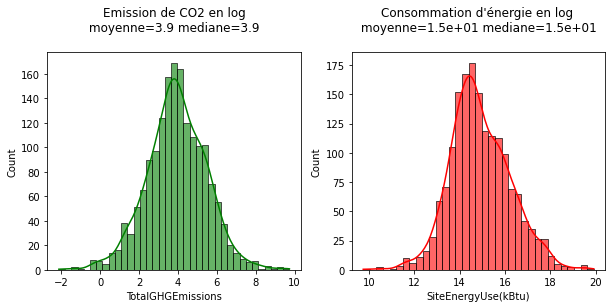

In [34]:
from sklearn.preprocessing import FunctionTransformer

Y = data[data['SiteEnergyUse(kBtu)']>0][['TotalGHGEmissions','SiteEnergyUse(kBtu)']]
logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_log = logtransformer.transform(Y)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10,4))

sns.histplot(data=Y_log,x="TotalGHGEmissions",kde=True,ax=axes[0],color="g",alpha=0.6)
axes[0].set_title("Emission de CO2 en log\n moyenne={:.2} mediane={:.2} \n ".format(Y_log['TotalGHGEmissions'].mean(),
                                                                                    Y_log['TotalGHGEmissions'].median()))


sns.histplot(data=Y_log,x="SiteEnergyUse(kBtu)",kde=True, ax=axes[1],color="r",alpha=0.6)
axes[1].set_title("Consommation d'énergie en log \n moyenne={:.2} mediane={:.2} \n ".format(Y_log['SiteEnergyUse(kBtu)'].mean(),
                                                                                            Y_log['SiteEnergyUse(kBtu)'].median()))


Les distributions sont lognormales

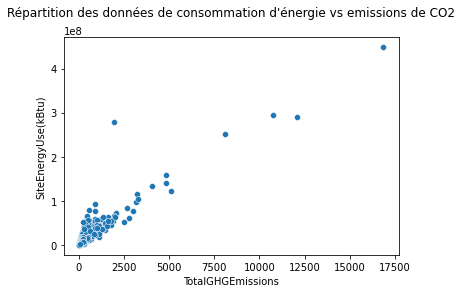

In [35]:
fig=plt.figure()
sns.scatterplot(data=data, x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)")
plt.title("Répartition des données de consommation d'énergie vs emissions de CO2\n")
plt.show()

Les points ne sont pas alignes donc pas de regression lineaire entre les 2 variables

In [36]:
data['Neighborhood']=data['Neighborhood'].apply(lambda x: 'DELRIDGE' if x=='DELRIDGE NEIGHBORHOODS' else x.upper())
data['Neighborhood'].unique()

array(['DOWNTOWN', 'LAKE UNION', 'GREATER DUWAMISH', 'EAST', 'NORTHWEST',
       'SOUTHEAST', 'BALLARD', 'MAGNOLIA / QUEEN ANNE', 'NORTHEAST',
       'CENTRAL', 'NORTH', 'SOUTHWEST', 'DELRIDGE'], dtype=object)

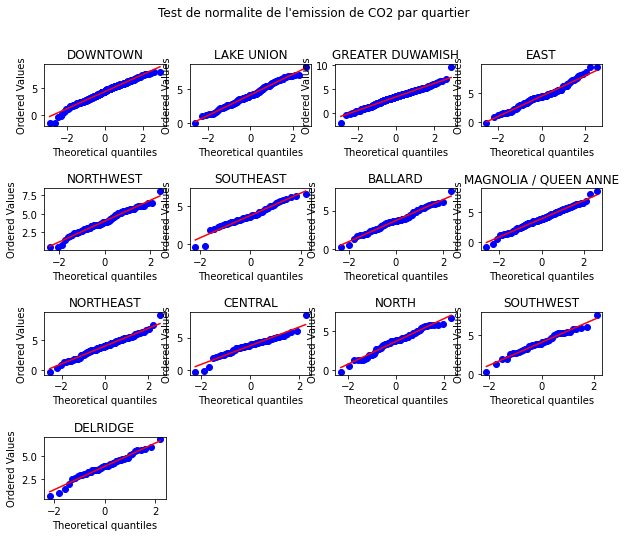

In [37]:
import scipy.stats as stats
d=data[data['SiteEnergyUse(kBtu)']>0].copy()
d['logCo2']=Y_log['TotalGHGEmissions']
unique_neigh=data['Neighborhood'].unique()

ngraphe=len(unique_neigh)
ncols=4
nrows=ngraphe//ncols+1

plt.figure(figsize=(10,8))
plt.suptitle("Test de normalite de l'emission de CO2 par quartier" )
plt.gcf().subplots_adjust(hspace=1)

for k in range(len(unique_neigh)) :
    plt.subplot(nrows,ncols,k+1)
    stats.probplot(d[d['Neighborhood'] == unique_neigh[k]]['logCo2'], dist="norm", plot=plt)
    plt.title( unique_neigh[k])
    
plt.show()  


In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
model=ols('logCo2 ~ Neighborhood', data = d).fit() 
result_anova=sm.stats.anova_lm(model) # ANOVA Test
print(result_anova)

                  df       sum_sq    mean_sq         F        PR(>F)
Neighborhood    12.0   211.853593  17.654466  7.994405  1.000600e-14
Residual      1682.0  3714.449444   2.208353       NaN           NaN


Il existe donc des differences significatives de moyenne sur les emissions de Co2 suivant les quartiers

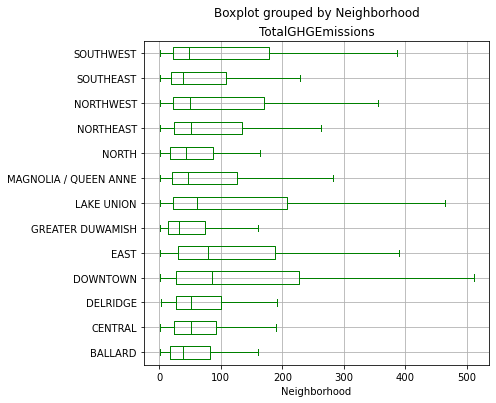

In [39]:
temp = data[['Neighborhood', 'TotalGHGEmissions','SiteEnergyUse(kBtu)']]
fig,ax=plt.subplots(figsize=(6,6))
temp.boxplot('TotalGHGEmissions',by='Neighborhood',ax=ax,color="g",vert=False,showfliers=False)

plt.show()

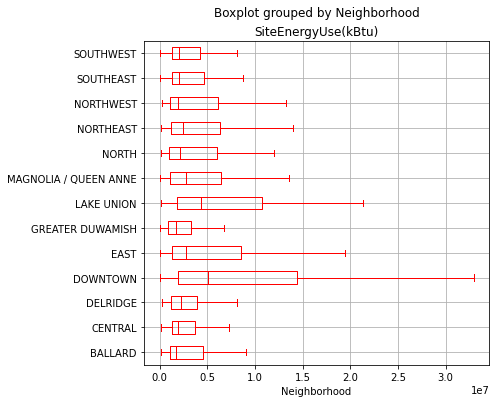

In [40]:
fig,ax=plt.subplots(figsize=(6,6))
temp.boxplot('SiteEnergyUse(kBtu)',by='Neighborhood',ax=ax,color="r",vert=False,showfliers=False)
plt.show()

Les quartiers n'ont pas les mêmes emissions de CO2 et de consommation d'energie

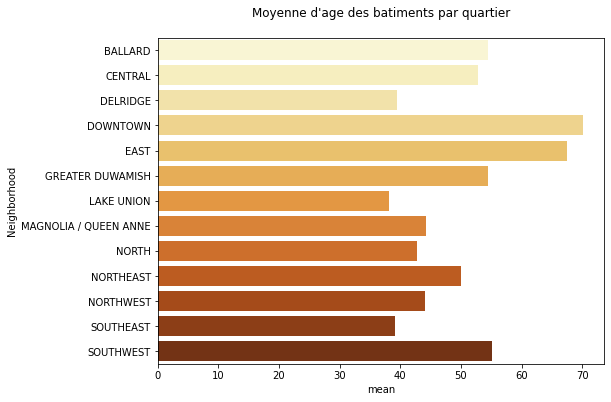

In [41]:
neigh_age=data.loc[:,['Neighborhood', 'AgeBuilding']].groupby('Neighborhood').agg(['mean'])

fig=plt.figure( figsize=(8,6))
sns.barplot(data=neigh_age,x=neigh_age['AgeBuilding']['mean'],y=neigh_age.index,
            palette=sns.color_palette("YlOrBr", 13))
plt.title("Moyenne d'age des batiments par quartier\n")


plt.show()

Downtown a les batiments les plus vieux en moyenne, la plus grande emissions de CO2 et de consommation d'energie

In [42]:
data[data['DefaultData'].isin(['Yes',True])]['ComplianceStatus'].unique()


array(['Compliant', 'Error - Correct Default Data'], dtype=object)

In [43]:
print("Nombre de ligne identifiées comme non conforme : {}.".format(data[data['ComplianceStatus']!="Compliant"].shape[0]))

Nombre de ligne identifiées comme non conforme : 120.


In [44]:
data=data[data['ComplianceStatus'] == "Compliant"]

In [45]:
data = data.drop(['DefaultData','ComplianceStatus', 'City','TaxParcelIdentificationNumber',
                  'CouncilDistrictCode','DataYear','YearsENERGYSTARCertified'], axis=1)
data.shape

(1576, 27)

<AxesSubplot:title={'center':'NumberofFloors'}, xlabel='BuildingType'>

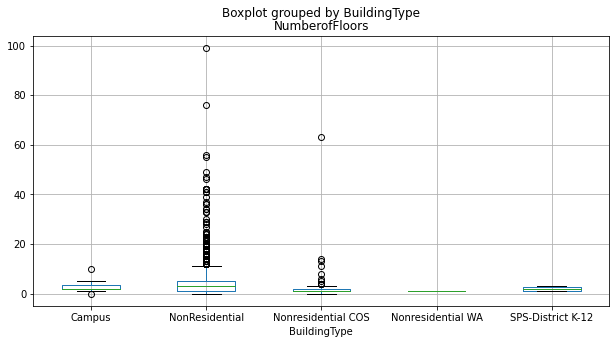

In [46]:
data.boxplot('NumberofFloors', by='BuildingType', figsize=(10, 5))

In [47]:
data[data['NumberofFloors']>50][['PrimaryPropertyType','PropertyName']]

,PrimaryPropertyType,PropertyName
257,Large Office,Seattle Municipal Tower (2030)
295,Large Office,1201 Third Avenue
316,Large Office,Two Union Square
595,Large Office,Columbia Center - 2015
967,Worship Facility,Seattle Chinese Baptist Church


In [48]:
data[data['PropertyName'].isin(['Seattle Chinese Baptist Church','Olive 8'])][['PropertyName','NumberofFloors','UseTypeNumber']]

,PropertyName,NumberofFloors,UseTypeNumber
967,Seattle Chinese Baptist Church,99.0,un
1346,Olive 8,39.0,plusieurs


In [49]:
data=data[data['NumberofFloors']<99]

In [50]:
data.loc[data['PrimaryPropertyType']=='Restaurant\n','PrimaryPropertyType']='Restaurant'

In [51]:
print(data['PrimaryPropertyType'].value_counts())


Small- and Mid-Sized Office    293
Other                          252
Warehouse                      185
Large Office                   172
Mixed Use Property             114
Retail Store                    88
Hotel                           75
Worship Facility                69
Distribution Center             53
K-12 School                     51
Medical Office                  42
Supermarket / Grocery Store     40
Self-Storage Facility           28
University                      23
Residence Hall                  21
Senior Care Community           20
Restaurant                      13
Refrigerated Warehouse          12
Laboratory                      10
Hospital                        10
Non-Refrigerated Warehouse       2
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64


In [52]:
data['PrimaryType']=data['PrimaryPropertyType']
data['PrimaryType']=data['PrimaryType'].apply(lambda x: 'Care' if ('Hosp' in x or 'Care' in x or 'Med' in x or 'Lab' in x)  
                                             else ('Lodging' if ('Hot' in x  or 'Resid' in x or 'Low' in x) 
                                             else ('Education' if ('Sch' in x or 'Univ' in x)  
                                             else ('Warehouse' if ('Ware' in x) 
                                             else ('GlobalStore' if ('Super' in x or 'Dist' in x or 'Rest' in x or 'Self' in x)
                                                   else x)))))


In [53]:
print(data['PrimaryType'].value_counts())


Small- and Mid-Sized Office    293
Other                          252
Warehouse                      199
Large Office                   172
GlobalStore                    134
Mixed Use Property             114
Lodging                         98
Retail Store                    88
Care                            82
Education                       74
Worship Facility                69
Name: PrimaryType, dtype: int64


In [54]:
data['PrimaryType']=data['PrimaryType'].apply(lambda x: 'GlobalStore' if 'Retail' in x 
                                              else ('CareEdu' if ('Care' in x or 'Edu' in x)
                                                   else ('Lodging' if 'Wor' in x else x)))

In [55]:
print(data['PrimaryType'].value_counts())

Small- and Mid-Sized Office    293
Other                          252
GlobalStore                    222
Warehouse                      199
Large Office                   172
Lodging                        167
CareEdu                        156
Mixed Use Property             114
Name: PrimaryType, dtype: int64


<AxesSubplot:title={'center':'TotalGHGEmissions'}, xlabel='PrimaryType'>

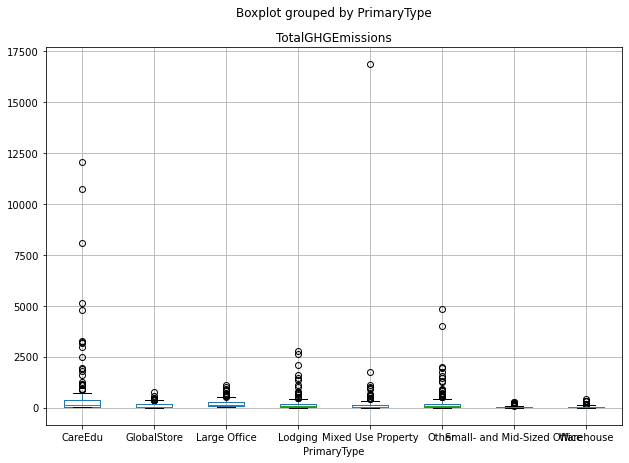

In [56]:
data.boxplot('TotalGHGEmissions', by='PrimaryType', figsize=(10, 7))

In [57]:
data[data['TotalGHGEmissions']>15000]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,State,ZipCode,Neighborhood,Latitude,Longitude,...,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GFABuildingProp,GFAParkingProp,GFAPerBuilding,GFAPerFloor,UseTypeNumber,AgeBuilding,PrimaryType
64,43,Campus,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,WA,98108,GREATER DUWAMISH,47.5349,-122.318,...,150476283.0,297909000.0,16870.98,1.0,0.0,494835.0,164945.0,plusieurs,24,Mixed Use Property


In [58]:
data=data[data['TotalGHGEmissions']<15000]

<AxesSubplot:title={'center':'SiteEnergyUse(kBtu)'}, xlabel='PrimaryType'>

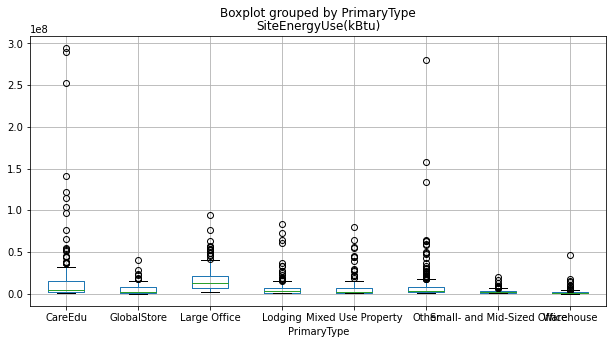

In [59]:
data.boxplot('SiteEnergyUse(kBtu)', by='PrimaryType', figsize=(10, 5))

In [60]:
data[data['SiteEnergyUse(kBtu)']>2.5*10**8]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,State,ZipCode,Neighborhood,Latitude,Longitude,...,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GFABuildingProp,GFAParkingProp,GFAPerBuilding,GFAPerFloor,UseTypeNumber,AgeBuilding,PrimaryType
152,198,NonResidential,Hospital,Seattle Children's Hospital Main Campus,4800 Sand Point Way NE,WA,98105,NORTHEAST,47.6623,-122.281,...,115194674.5,137319838.0,8096.110,1.0,0.0,251142.857,87900.000,un,63,CareEdu
197,276,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,WA,98104,EAST,47.604,-122.324,...,169787594.0,2029276.5,10757.605,1.0,0.0,231738.200,144836.375,plusieurs,16,CareEdu
574,753,NonResidential,Other,WestinBuilding,2001 6th Ave,WA,98121,DOWNTOWN,47.6144,-122.339,...,279629408.5,151155.5,1957.390,1.0,0.0,429405.000,13012.273,plusieurs,35,Other
634,828,NonResidential,Hospital,Swedish First Hill,747 Broadway,WA,98122,EAST,47.609,-122.322,...,139901575.0,17844720.0,12066.025,1.0,0.0,441492.500,126140.714,plusieurs,22,CareEdu


L'objectif est de supprimer les relevés couteux pour les années à venir. On doit donc enlever toutes les données de releve du dataset.

In [61]:
d1=data.drop(['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)'], axis=1)
d1.shape

(1574, 25)

In [62]:
d1[d1['Outlier'].notna()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,State,ZipCode,Neighborhood,Latitude,Longitude,...,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,GFABuildingProp,GFAParkingProp,GFAPerBuilding,GFAPerFloor,UseTypeNumber,AgeBuilding,PrimaryType
10,19656,NonResidential,Small- and Mid-Sized Office,1916 Boren Building,1916 BOREN AVE,WA,98101,DOWNTOWN,47.61753888,-122.33278228,...,NaN,133880.0,0.93,1.0,0.0,21600.0,7200.000,un,86,Small- and Mid-Sized Office
19,22446,NonResidential,Small- and Mid-Sized Office,SALTY DOG POTTERY & THE BOATWRIGHT,4602 14TH AVE NW,WA,98107,BALLARD,47.6624069,-122.3730847,...,100.0,238255.0,3.59,1.0,0.0,24913.0,8304.333,un,112,Small- and Mid-Sized Office


On conserve les deux outliers par valeurs inferieures et on spprime la colonne dans le dataset.

In [63]:
low_ouliers=d1[d1['Outlier'].notna()]
d2=d1.drop(['Outlier'],axis=1)

In [64]:
d2.set_index("OSEBuildingID").to_csv('etude_CO2_NRJ.csv')